## Clustering of Twitter users

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn.metrics as metrics
import matplotlib.colors as mc
import colorsys
import os

In [ ]:
PATH_DIR = './'
os.chdir(PATH_DIR)

### Preparing the dataset

In [2]:
PATH = 'Data/Original dataset 11-2022/'
PATH_FILE_XLSX = 'users.xlsx'

dataset = pd.read_excel(PATH+PATH_FILE_XLSX)

In [3]:
integers_columns = ['friends_count', 'followers_count', 'listed_count', 'favourites_count', 'statuses_count', 'created_at']
boolean_columns = ['location', 'verified', 'geo_enabled', 'default_profile', 'default_profile_image', 'protected']

original_columns = ['friends_count', 'followers_count', 'verified', 'location',
       'protected', 'geo_enabled', 'listed_count', 'favourites_count',
       'statuses_count', 'default_profile', 'default_profile_image', 'created_at']

df = dataset[original_columns]

df.head()

,friends_count,followers_count,verified,location,protected,geo_enabled,listed_count,favourites_count,statuses_count,default_profile,default_profile_image,created_at
0,1766,83,0,1,0,0,1,25329,3119,1,0,2020
1,678,194699,0,1,0,1,441,1055,5909,1,0,2019
2,1740,2457,0,1,0,0,11,731,594737,0,0,2016
3,54,89,0,1,0,0,0,1537,1737,1,0,2022
4,3592,48900,0,1,0,0,22,18798,4386,1,0,2020


In [4]:
columns = ['friends_count', 'followers_count', 'listed_count', 'favourites_count', 'statuses_count']

data = dataset[columns]

data.head()

,friends_count,followers_count,listed_count,favourites_count,statuses_count
0,1766,83,1,25329,3119
1,678,194699,441,1055,5909
2,1740,2457,11,731,594737
3,54,89,0,1537,1737
4,3592,48900,22,18798,4386


In [7]:
with pd.option_context('mode.chained_assignment', None):
    for attribute in columns:
        data[attribute] =(data[attribute]-data[attribute].min())/(data[attribute].max()-data[attribute].min())

## Methods to determine the optimal number of clusters

### Elbow Method

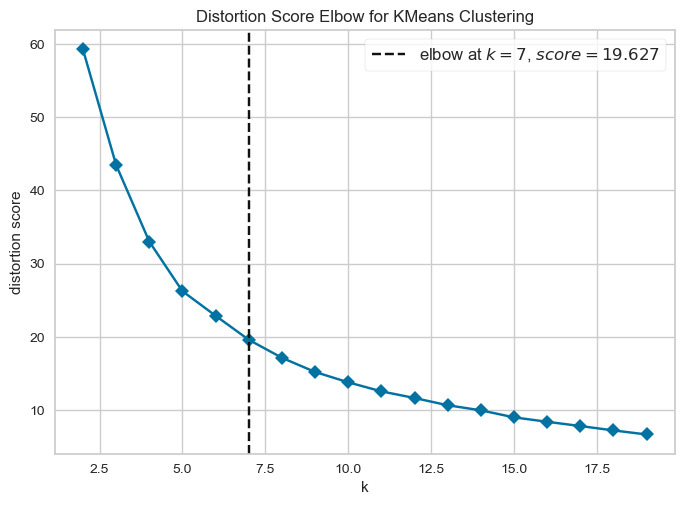

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,20), timings=False)

visualizer.fit(data)
visualizer.show()

### Silhouette Method

In [12]:
sil_score = []
for i in range(3,20):
    labels=KMeans(n_clusters=i,init="k-means++",n_init=10, max_iter=100, random_state=42).fit(data).labels_
    score = metrics.silhouette_score(data,labels,metric="euclidean",sample_size=10000)
    sil_score.append(score)
    print ("Silhouette score for k = "+str(i)+" is "+str(metrics.silhouette_score(data,labels,metric="euclidean",sample_size=10000)))

Silhouette score for k = 3 is 0.7547827914250398
Silhouette score for k = 4 is 0.7672326842929144
Silhouette score for k = 5 is 0.7166891431561954
Silhouette score for k = 6 is 0.6683687212942777
Silhouette score for k = 7 is 0.6716819990582992
Silhouette score for k = 8 is 0.6794982402067072
Silhouette score for k = 9 is 0.6519615534017125
Silhouette score for k = 10 is 0.6410064860958226
Silhouette score for k = 11 is 0.621824236291144
Silhouette score for k = 12 is 0.6218565855759823
Silhouette score for k = 13 is 0.6259768968538899
Silhouette score for k = 14 is 0.600364128349292
Silhouette score for k = 15 is 0.6010696643215968
Silhouette score for k = 16 is 0.5994274842680998
Silhouette score for k = 17 is 0.5947317925978962
Silhouette score for k = 18 is 0.5849697702923021
Silhouette score for k = 19 is 0.5807817101495922


Text(0.5, 1.0, 'Silhouette Score for KMeans Clustering')

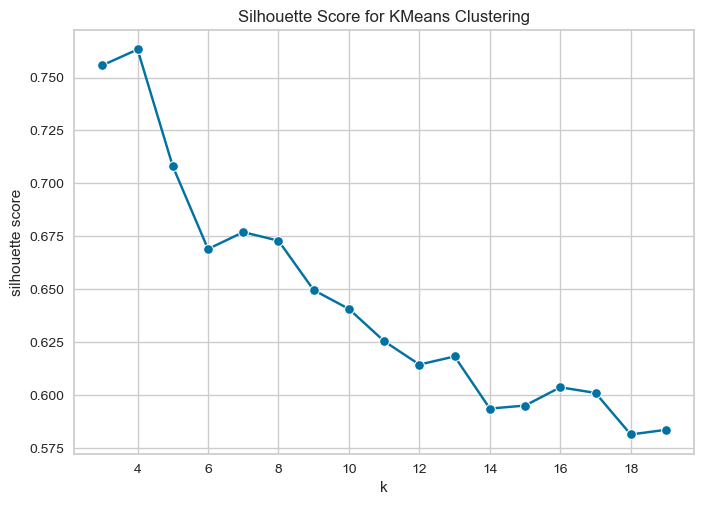

In [38]:
sil_centers = pd.DataFrame({'k' : SK, 'silhouette score' : sil_score})

sns.lineplot(x = 'k', y = 'silhouette score', data = sil_centers, marker="o").set_title("Silhouette Score for KMeans Clustering")

## K-Means clustering

In [32]:
def print_results_kmm(centroids, num_cluster_points):
    print ('\n\nFINAL RESULT:')
    for i, c in enumerate(centroids):
        print('\n\tCluster %d' % (i))
        print('\t\tNumber of points in cluster = %d' % num_cluster_points.count(i))
        print('\t\tCentroid: %s' % str(centroids[i]))

def k_means(data, num_clusters, max_iterations, init_cluster, tolerance, dataset_inicial):
    X = data.to_numpy()

    kmeans = KMeans(n_clusters=num_clusters, max_iter=max_iterations,
                    init=init_cluster, tol=tolerance, n_init=10)

    kmeans.fit(X)

    score = silhouette_score(X, kmeans.labels_)
    print("For n_clusters = {}, silhouette score is {:.2f}".format(num_clusters, score))

    # Obtain centroids and number Cluster of each point
    centroides = kmeans.cluster_centers_
    etiquetas = kmeans.labels_

    df_labels = dataset_inicial.assign(Cluster = etiquetas)

    print_results_kmm(centroides, etiquetas.tolist())

    return df_labels

In [34]:
NUM_CLUSTERS = 4
MAX_ITERATIONS = 5000
INITIALIZE_CLUSTERS = 'k-means++'
CONVERGENCE_TOLERANCE = 0.000001

print(f"\n\n------------------------ KMeans with {NUM_CLUSTERS} clusters ------------------------")
df_labels = k_means(data, NUM_CLUSTERS, MAX_ITERATIONS, INITIALIZE_CLUSTERS,
            CONVERGENCE_TOLERANCE, dataset)



------------------------ KMeans con 4 clusters ------------------------
For n_clusters = 4, silhouette score is 0.76


FINAL RESULT:

	Cluster 0
		Number Points in Cluster 61
		Centroid: [0.01354159 0.26510098 0.31849294 0.00147515 0.00369209]

	Cluster 1
		Number Points in Cluster 115096
		Centroid: [0.00077748 0.00031409 0.00061722 0.00509811 0.00047499]

	Cluster 2
		Number Points in Cluster 1774
		Centroid: [4.37101959e-03 1.52868621e-04 5.56393819e-04 1.62083383e-01
 5.86626336e-03]

	Cluster 3
		Number Points in Cluster 14158
		Centroid: [0.00260323 0.00014223 0.00044048 0.05002102 0.00184652]


In [ ]:
# Save the updated dataset with the clusters column
PATH = 'Data/Original dataset 11-2022/'
FILE_NAME= 'clustered_users'
df_labels.to_excel(PATH+FILE_NAME+'.xlsx', engine='xlsxwriter')

In [36]:
df_labels["Cluster"].value_counts()

Cluster
1    115096
3     14158
2      1774
0        61
Name: count, dtype: int64

## Visualization

In [24]:
colors = ['#66C5CCFF', '#FE88B1FF', '#F89C74FF', '#DCB0F2FF', '#8BE0A4FF', '#B497E7FF', '#FFCC66FF', '#6CC08BFF', '#68a4c7FF', '#d378e8FF', '#fb7f79', '#f0933d']

dict_pr = {}

def adjust_lightness(color, amount=0.5):
  try:
      c = mc.cnames[color]
  except:
      c = color
  c = colorsys.rgb_to_hls(*mc.to_rgb(c))
  return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

def create_plot(n):
  """
  x = math.floor(math.sqrt(n))
  y = math.ceil(n/x)
  return plt.subplots(x, y, figsize=(22, 12))
  """
  return plt.subplots(1, n, figsize=(28, 13))

def plot_bar_number_users_cluster(df_labels, number_clusters):
  users_each_cluster = df_labels["Cluster"].value_counts().to_dict()
  total_users = sum(users_each_cluster.values())
  percentaje_each_cluster = [(value / total_users) for value in users_each_cluster.values()]

  barWidth = .5
  xloc = np.arange(number_clusters)

  plt.bar(xloc, percentaje_each_cluster, width = barWidth, color=colors)

  plt.ylabel('Percentage', fontsize=12)
  plt.xlabel ('Clusters', fontsize=12)
  plt.xticks(xloc, users_each_cluster.keys())
  plt.title (f'Bar chart of the percentage of users by cluster', fontsize=12)
  plt.ylim(0, 1)
  plt.grid(axis='y', alpha=0.5)
  plt.yticks(fontsize=10)
  plt.xticks(fontsize=10)

  for i, (value) in enumerate(percentaje_each_cluster):
    plt.annotate(f"{round(value,2)}", (i, value), ha='center', va='bottom', fontsize=10)

  plt.show()


def plot_violin_distribution_integer_variables_cluster(list_df_clusters, integers_columns, N, clusters_name, zoom_values_integers):
  fig, axis = create_plot(len(integers_columns))
  xloc = np.arange(N)

  count = 0
  for ax, c in zip(axis.flatten(), integers_columns):
    data_clusters= []
    for count, df in enumerate(list_df_clusters):
      column= df[c].to_numpy().tolist()
      data_clusters.append(column)
      
    _vp= ax.violinplot(data_clusters)

    for patch, color in zip(_vp["bodies"], colors):
      patch.set_facecolor(adjust_lightness(color, amount=0.7))


    ax.set_xticks(np.arange(1, len(clusters_name) + 1), labels=clusters_name)
    ax.set_ylim(zoom_values_integers[count])

    ax.set_ylabel('Count', fontsize=12)
    ax.set_xlabel('Clusters', fontsize=12)
    ax.yaxis.grid(True)

    ax.set_title(f"{c}")

    count+= 1

  fig.suptitle('Distribution of the numerical attributes in the different groups obtained', fontsize= 18)
  plt.show()


def addlabels(ax, x,y):
  
  for i in range(len(x)):
      shift = -0.04
      if round(abs(y[i]),2) < 0.1:
        shift= 0.02
      
      ax.text(i, y[i]+ shift, round(abs(y[i]),2), ha = 'center')
      

def create_percent_data(list_df_clusters, c):
  list_percent_true= []
  list_percent_false= []

  for count, df in enumerate(list_df_clusters):

    count_true = df.apply(lambda x: x[c] ==  1, axis=1).sum()
    count_false = df.apply(lambda x: x[c] == 0, axis=1).sum()

    total = (count_true + count_false)

    percent_count_true = round(count_true / total, 2)
    percent_count_false= round(count_false / total, 2)

    list_percent_true.append(percent_count_true)
    list_percent_false.append(percent_count_false)

  return list_percent_true, list_percent_false

def plot_bar_distribution_boolean_variables_clusters(list_df_clusters, boolean_columns, N, clusters_name):
  fig, axis = create_plot(len(boolean_columns))
  barWidth = .5
  xloc = np.arange(N)

  for ax, c in zip(axis.flatten(), boolean_columns):
    list_percent_true, list_percent_false= create_percent_data(list_df_clusters, c)

    p1 = ax.bar (xloc, list_percent_true, width = barWidth, color= 'orange')
    p2 = ax.bar (xloc, list_percent_false, bottom = list_percent_true, width = barWidth, color= 'lightslategray')

    ax.set_ylabel('Percentage of users')
    ax.set_xlabel ('Clusters')
    ax.set_title (f'{c}')
    ax.set_xticks (xloc, clusters_name)
    addlabels(ax, clusters_name, list_percent_true)

  fig.suptitle('Distribution of boolean attributes among the different groups obtained', fontsize= 18)
  fig.legend(('True', 'False'), loc='upper right', shadow=True, borderaxespad=0.5, fontsize=18)
  plt.show()

def representation_distribution_clusters(df_labels, number_clusters, clusters_name, zoom_values_integers=[(0, 1500000), (0, 150000000), (0, 300000), (0, 3500000), (0, 55000000), (2005, 2024)], zoom_values_opt=None):
  list_df_clusters= []

  plot_bar_number_users_cluster(df_labels, number_clusters)

  for n in range(number_clusters):
    list_df_clusters.append(df_labels.loc[df_labels['Cluster'] == n]) 
  

  plot_violin_distribution_integer_variables_cluster(list_df_clusters, integers_columns, number_clusters, clusters_name, zoom_values_integers)

  if (zoom_values_opt != None):
    plot_violin_distribution_integer_variables_cluster(list_df_clusters, integers_columns, number_clusters, clusters_name, zoom_values_opt)

  plot_bar_distribution_boolean_variables_clusters(list_df_clusters, boolean_columns, number_clusters, clusters_name) 


In [16]:
PATH = 'Data/Original dataset 11-2022/'
PATH_FILE_XLSX = 'clustered_users.xlsx'

df_labels = pd.read_excel(PATH+PATH_FILE_XLSX)

In [18]:
NUM_CLUSTERS = 4

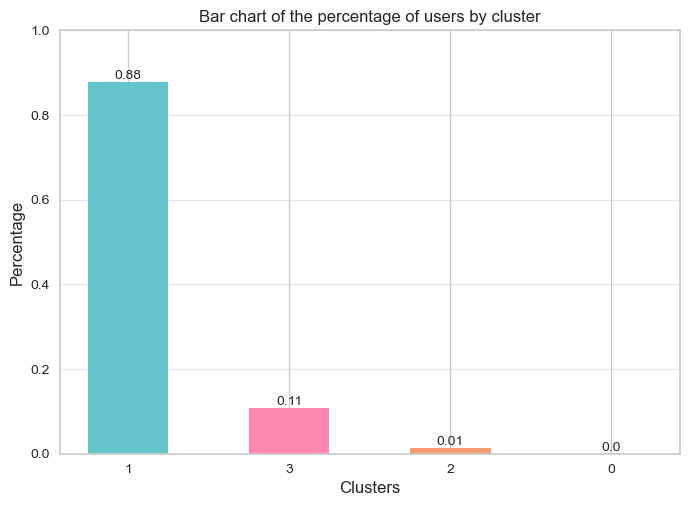

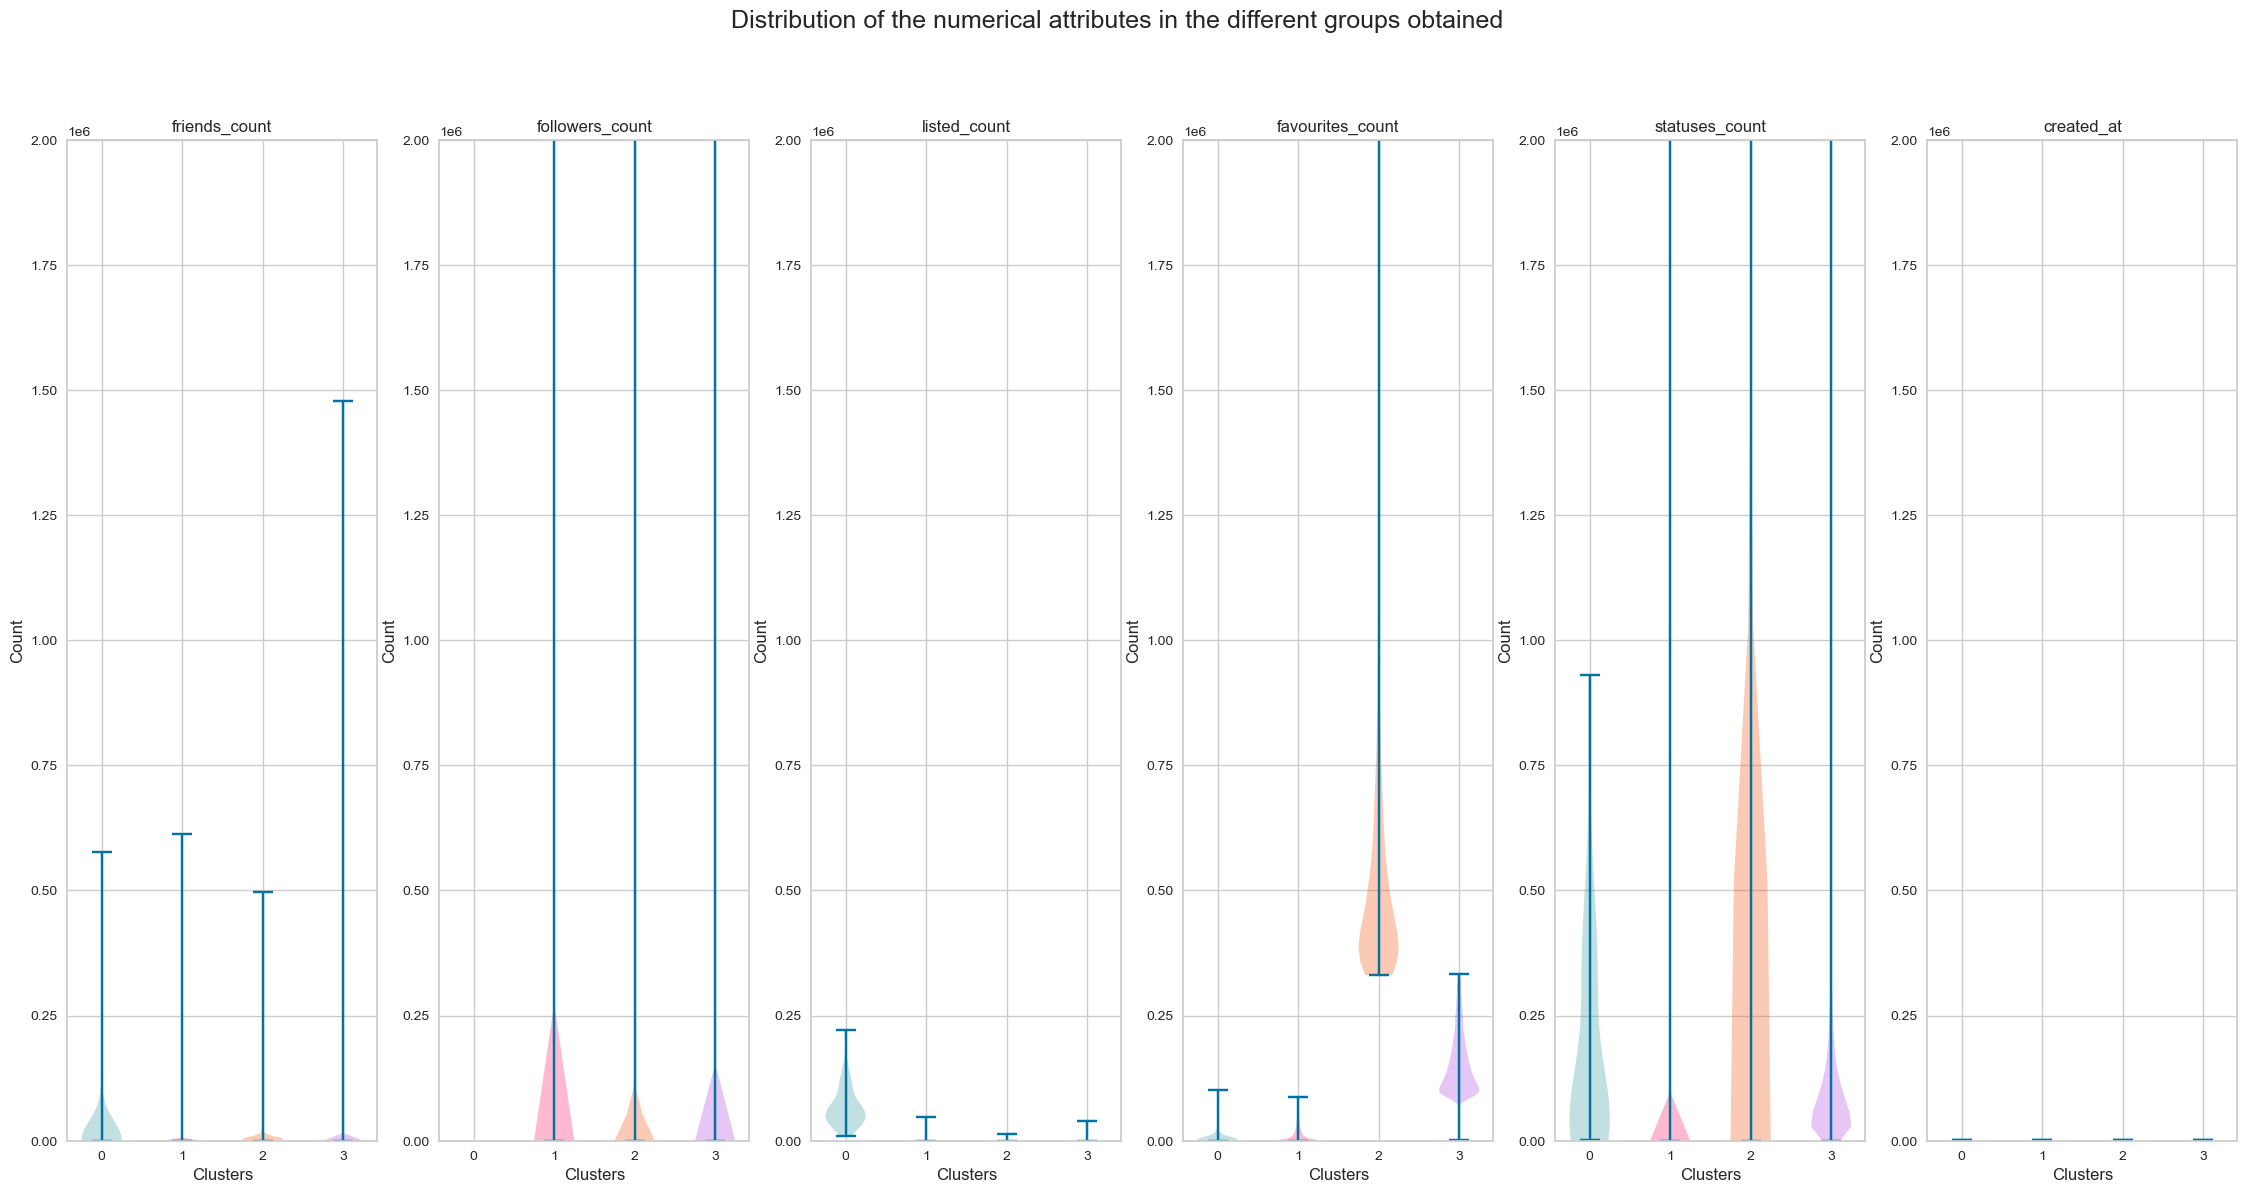

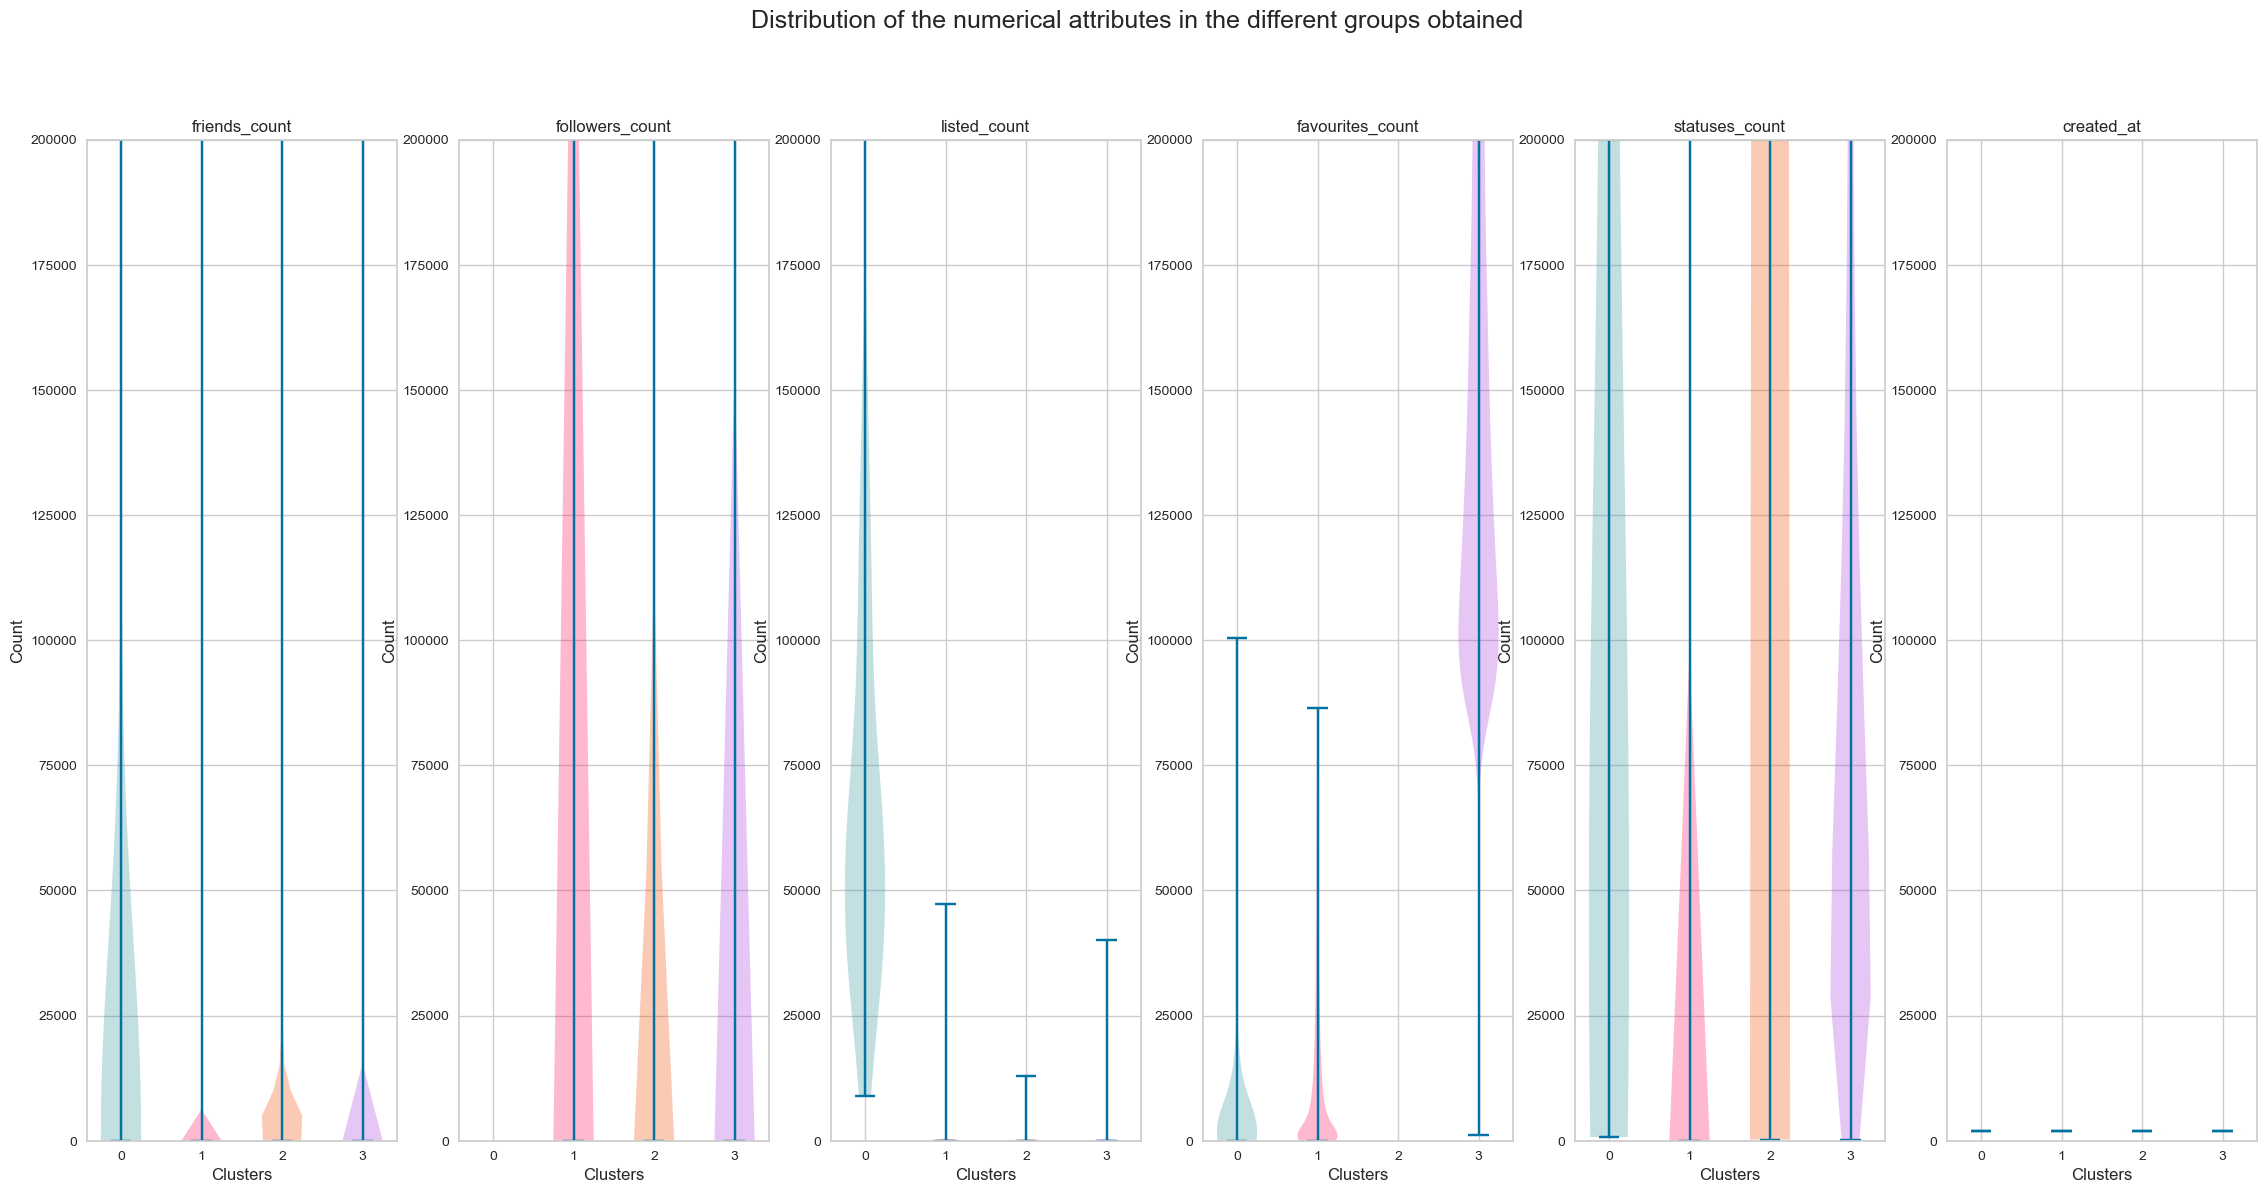

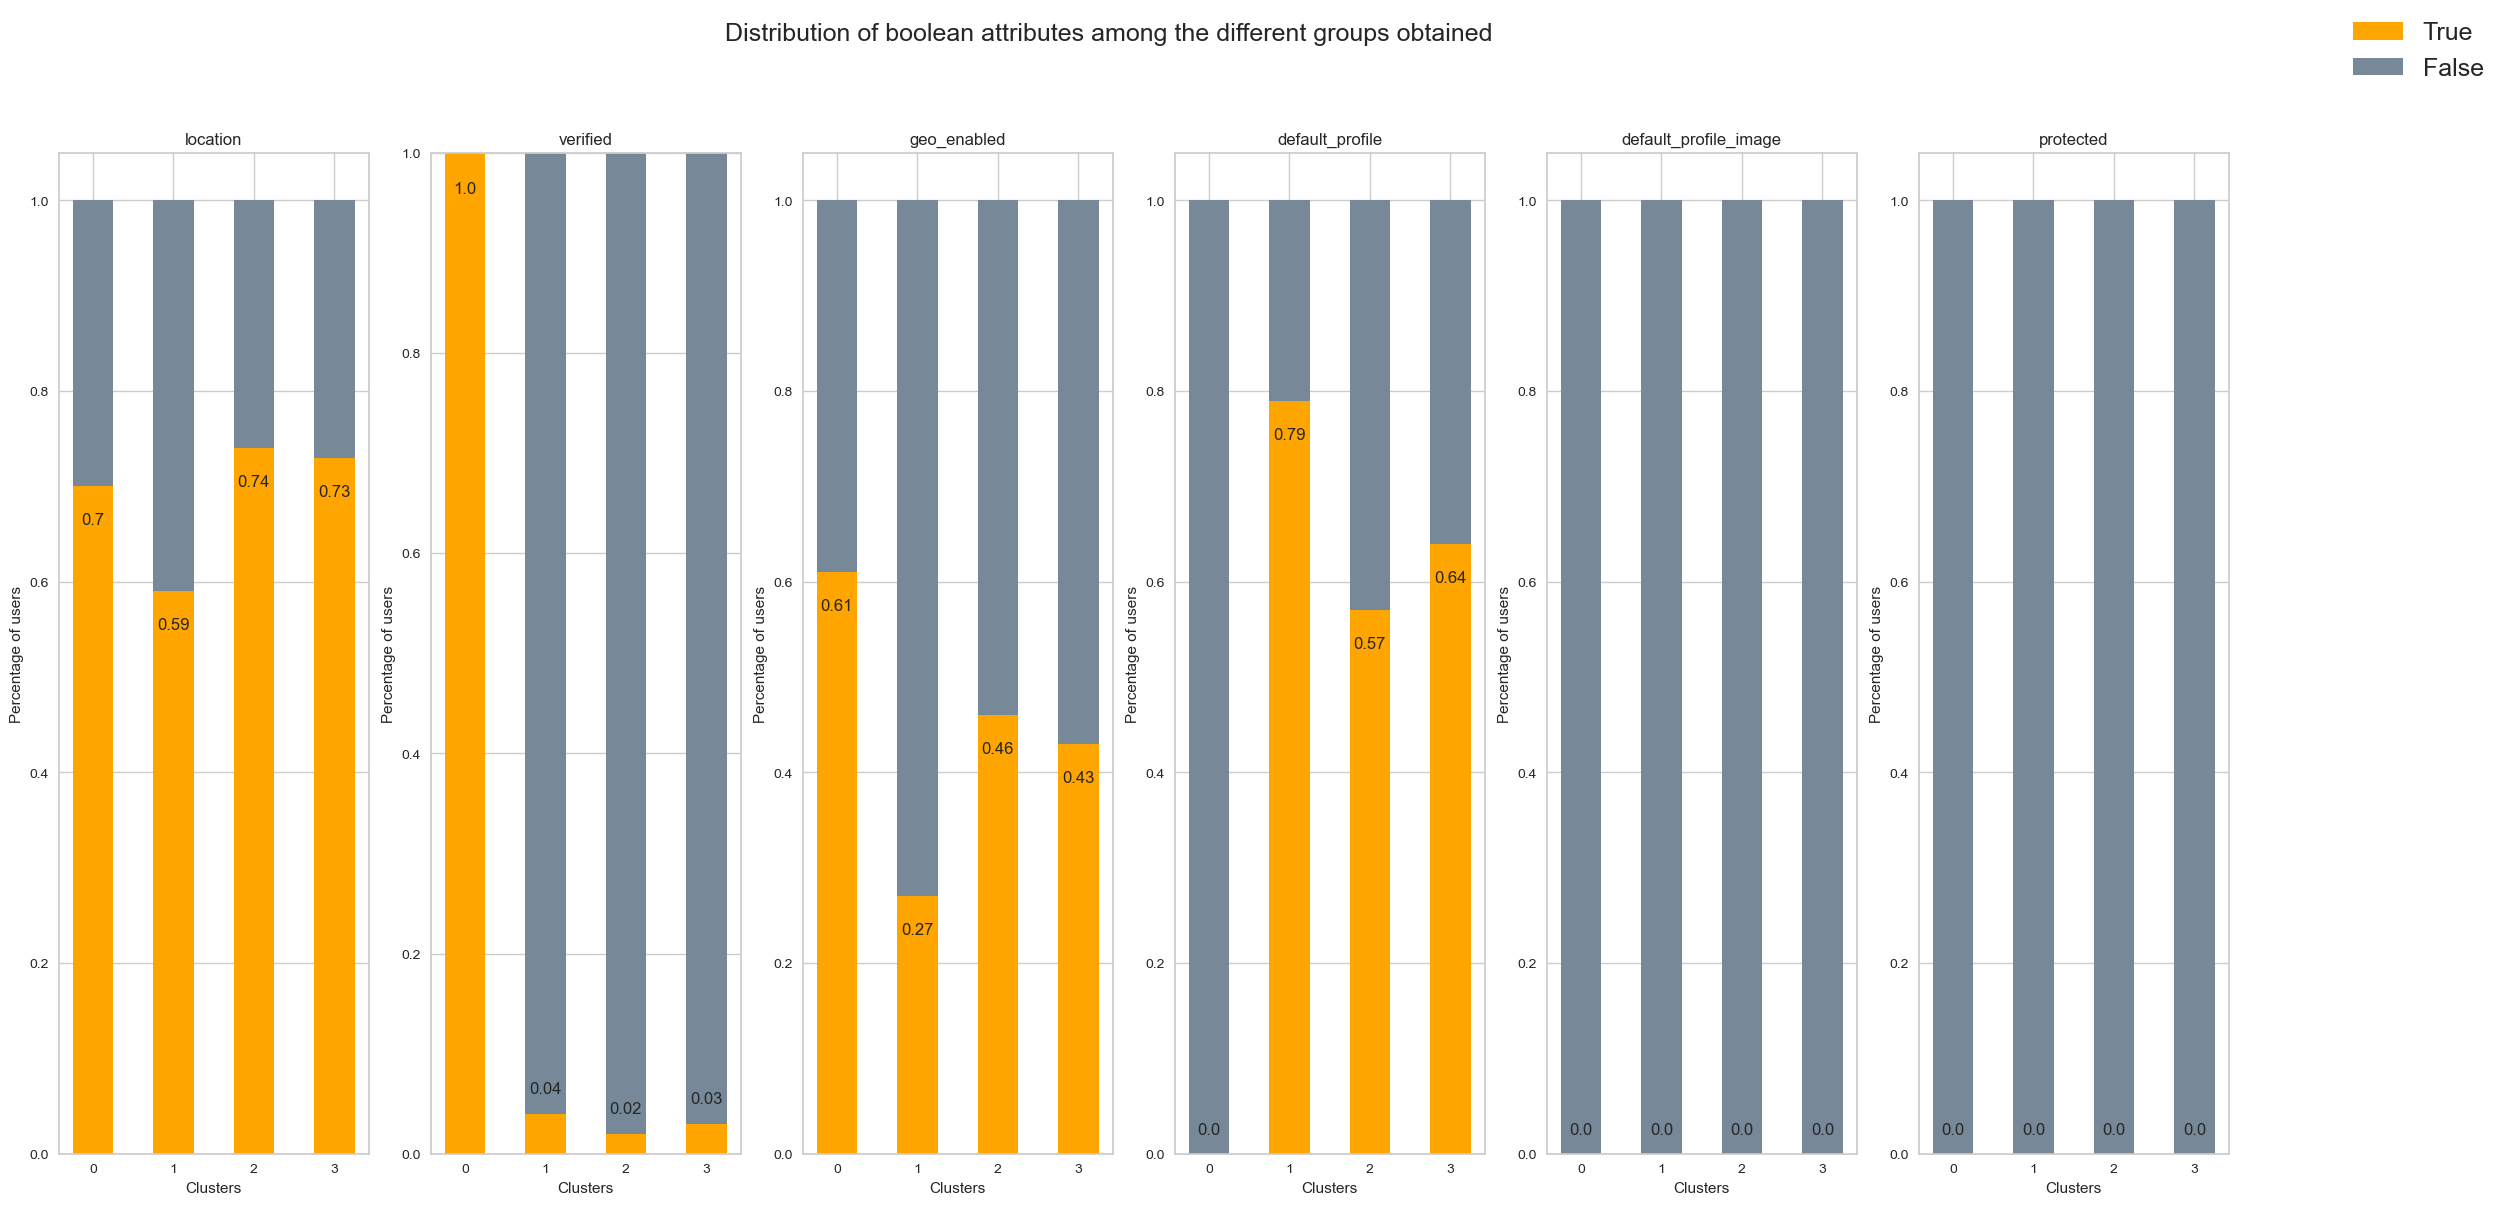

In [25]:
clusters_name = []
for i in range(NUM_CLUSTERS):
    clusters_name.append(str(i))

zoom_values_integers = [(0, 100000), (0, 80000000), (0, 150000), (0, 2000000), (0, 10000000), (2005, 2024)]
zoom_values_opt = [(0, 30000), (0, 500000), (0, 1000), (0, 200000), (0, 2000000), (2005, 2024)]

representation_distribution_clusters(df_labels, NUM_CLUSTERS, clusters_name, zoom_values_integers, zoom_values_opt)